# Analysis of Top 100 Chess Players Historical

### Content:
1. Introduction
2. Data description and objectives
3. Research questions
4. Data cleaning and shaping
5. Data visualization
6. Conclusion

## 1.Introduction: Top 100 chess players


The Fédération Internationale des Échecs (FIDE) governs international chess competition. Each month, FIDE publishes the lists "Top 100 Players", "Top 100 Women", "Top 100 Juniors" and "Top 100 Girls", as well as rankings of countries according to the average rating of their top 10 players and top 10 female players. The Elo rating system is used.
 The Elo rating system was developed by the Hungarian physicist Arpad Elo in the 1950's and adopted by the world chess federation (FIDE) in 1970.  For more than four decades the FIDE Elo system has served as the primary yardstick in the world for measuring the strength of chess players.  FIDE ratings are used for determining invitations to chess tournaments including the world championship cycle, calculating specific pairings in most chess tournaments, and granting titles such as International Master (IM) or Grandmaster (GM).  In fact the Elo system is so popular that it has been adapted to many other applications beyond chess, including team sports rankings, other board games, and online video game systems.

Source(https://en.wikipedia.org/wiki/FIDE_world_rankings)
(https://en.wikipedia.org/wiki/Elo_rating_system)


## 2.Data descriptions and objectives

My analysis was based on period from July 2000 and June 2017.Below is data that i will use for my analysis:
+ Ranking date - date of ranking 
+ Rank - position in the list
+ Name - name of player
+ Title - title of a player (g - Grand Master, wg - Women Grand Master)
+ Country - country of birth
+ Rating - standard rating
+ Games - games played
+ Region - region of a player



## 3.Research questions




For these project i prepare 5 main things that me gonna analyze:
1. Analyze rating changes of the number one players over time
2. Analyze players belonging to the countries and regions 
3. Analyze players who have played the most games
4. Analyze number of players in each rating range (in 27-06-2017)
5. Analyze the highest place that was taken by each country players

## 4.Data cleaning and shaping


In this part, i drop not necessary columns and check my dataset for null values.

In [2]:
#import all libraries that will be used
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

### 4.1. Importing dataset and drop not necessary column

In [3]:
#import dataset
df= pd.read_csv("datasets_1417_2662_fide_historical.csv")

#Here i drop column that i will not use in my future analysis
drop=(['birth_year'])
df.drop(drop,axis='columns',inplace=True)
df

,ranking_date,rank,name,title,country,rating,games
0,27-07-00,1,"Kasparov, Garry",g,RUS,2849,35
1,27-07-00,2,"Kramnik, Vladimir",g,RUS,2770,23
2,27-07-00,3,"Anand, Viswanathan",g,IND,2762,23
3,27-07-00,4,"Morozevich, Alexander",g,RUS,2756,28
4,27-07-00,5,"Adams, Michael",g,ENG,2755,38
...,...,...,...,...,...,...,...
11506,27-06-17,96,"Safarli, Eltaj",g,AZE,2656,9
11507,27-06-17,97,"Shirov, Alexei",g,LAT,2656,9
11508,27-06-17,98,"Granda Zuniga, Julio E",g,PER,2656,4
11509,27-06-17,99,"Robson, Ray",g,USA,2656,0


### 4.2. Creating a new column 

In [4]:
#Creating a new column - Region
regions = {
     'Western Europe' :
        ['ENG','SWE','ESP','UKR','FRA','BEL','NOR','GER','SUI','GRE',
         'FIN','AUT','DEN','ISL','NED','IRL'],
    'Eastern Europe':
        ['HUN','POL','SLO','BUL','SVK','CRO','ROM','CZE','MKD','ROU','SRB','BIH'],
    'Former Soviet Union' :
        ['RUS','ARM','BLR','TJK','GEO','MDA','UZB','LAT','KAZ','AZE','LTU'],
    'America' : 
        ['USA','PAR','CAN','CUB','PER','ARG','BRA','VEN'],
    'Middle East & Africa' :
        ['EGY','TUR','ISR','UAE','MAR','IRI'],
    'Asia' :
        ['CHN','PHI','VIE','SGP','SCG','IND','INA']}
regionsmap = {}
for region, countrylist in regions.items():
    regionsmap.update({country: region for country in countrylist})
df['Region']=df['country'].map(regionsmap)

#In this table example , we can see that players ranked by their rating, as it was said before in introduction
df.head(5)

,ranking_date,rank,name,title,country,rating,games,Region
0,27-07-00,1,"Kasparov, Garry",g,RUS,2849,35,Former Soviet Union
1,27-07-00,2,"Kramnik, Vladimir",g,RUS,2770,23,Former Soviet Union
2,27-07-00,3,"Anand, Viswanathan",g,IND,2762,23,Asia
3,27-07-00,4,"Morozevich, Alexander",g,RUS,2756,28,Former Soviet Union
4,27-07-00,5,"Adams, Michael",g,ENG,2755,38,Western Europe


### 4.3. Information about our data

In [5]:
#Data information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11511 entries, 0 to 11510
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ranking_date  11511 non-null  object
 1   rank          11511 non-null  int64 
 2   name          11511 non-null  object
 3   title         11511 non-null  object
 4   country       11511 non-null  object
 5   rating        11511 non-null  int64 
 6   games         11511 non-null  int64 
 7   Region        11435 non-null  object
dtypes: int64(3), object(5)
memory usage: 719.6+ KB
None


### 4.4. Identifying columns with missed values

In [6]:
print('Number of missing data:')
print(df.isnull().sum())

Number of missing data:
ranking_date     0
rank             0
name             0
title            0
country          0
rating           0
games            0
Region          76
dtype: int64


### 4.5. Fixing columns with missing values

In [7]:
#Fix column region
df['Region'].fillna(0, inplace=True)

In [8]:
#Checking again, to be confidence that's there no missing values
print(df.isnull().sum())

ranking_date    0
rank            0
name            0
title           0
country         0
rating          0
games           0
Region          0
dtype: int64


## 5.Data visualization


### 5.1. Rating changes of the number one players over time



In this section we are going to answer to our research questions by applying  data visualization techniques.

In [9]:
#Create a list of Top 1 players in this 17 year period
df2=df[df['rank']==1][['ranking_date', 'name']]
num1_list={'Kasparov, Garry'   : 'b',
     'Topalov, Veselin'  : 'g',
     'Anand, Viswanathan': 'y',
     'Kramnik, Vladimir' : 'k',
     'Carlsen, Magnus'   : 'r'}

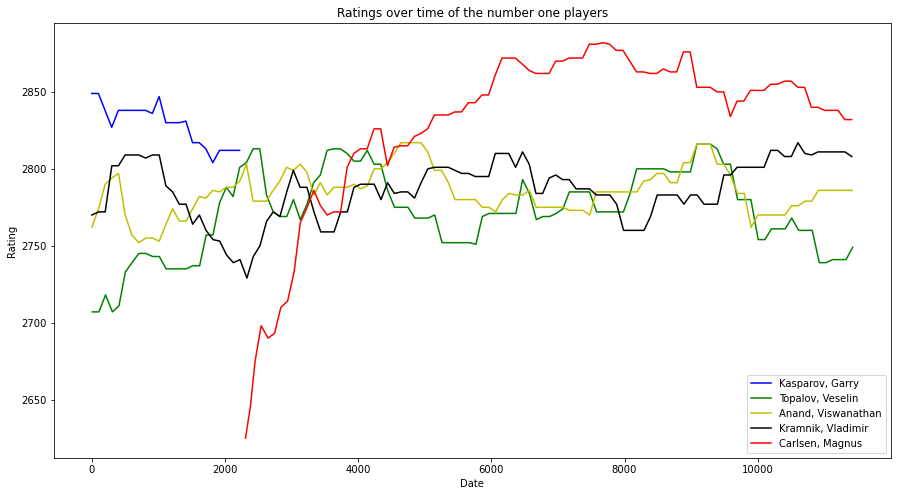

In [10]:
#This graph illustrates us how rating of Top 1 players changes over the time 
fig, ax = plt.subplots(figsize=(15,8))
for n in num1_list.keys():
    df[df['name']==n][['ranking_date','rating']]\
        .rename(columns={'rating': n})\
        .plot(ax=ax, label=n, color=num1_list[n])
plt.ylabel('Rating')
plt.xlabel('Date')
ax.legend(loc='lower right')
plt.title('Ratings over time of the number one players');

### 5.2. Players belongings to countries and regions 

Text(0.5, 1.0, 'Player by region')

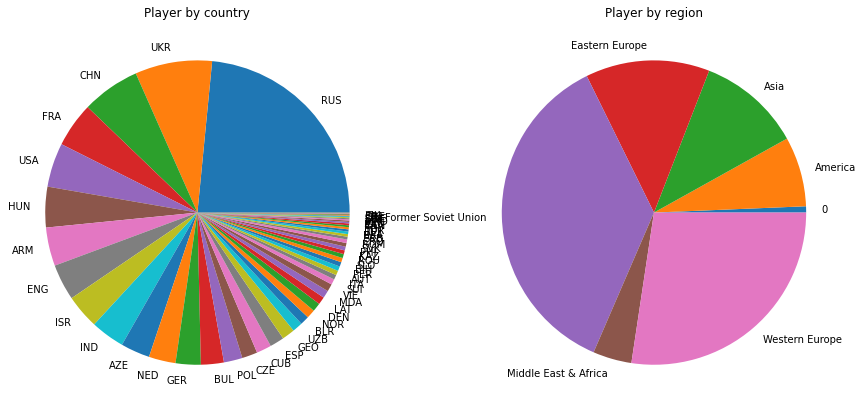

In [11]:
#grouping data
country=df.groupby(['country', 'Region'], as_index=False)\
    ['name'].count()\
    .rename(columns={'name':'count'})\
    .sort_values('count', ascending=False)
#Calculate number of players from each country

#Shows from which country sum of players is
country['country2']=''
country.loc[country['count']>4,'country2']=country['country']

#Calculate number of players from each region
region=country.groupby('Region', as_index=False)\
     ['count'].sum()
    
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[1].pie(x=region['count'], labels=region['Region']);
ax[0].pie(x=country['count'], labels=country['country2']);
ax[0].set_title('Player by country')
ax[1].set_title('Player by region')





### 5.3. Players who have played the most games over the period

In [12]:
#Here we drop not necessary columns for this analysis ,and find the sum of played games of eacch player over the period
df.drop(columns=['ranking_date','rank','title','rating']).groupby(['name']).sum().reset_index().sort_values(by=['games']).head(10)

,name,games
143,"Kasparov, Gary",0
51,"Crisan, Alexandru",0
272,"Salov, Valery",0
167,"L'Ami, Erwin",5
273,"Sandipan, Chanda",8
299,"Solak, Dragan",9
260,"Romanishin, Oleg M",9
80,"Filippov, Anton",9
38,"Bologan, Victor",9
229,"Onischuk, Vladimir",9


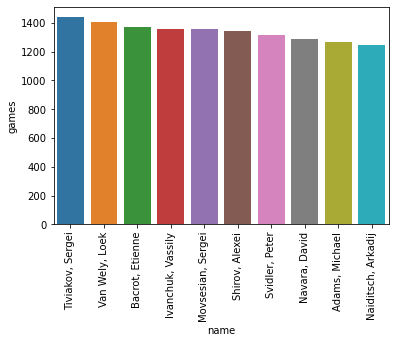

In [13]:
#We create barplot, which shows us a players who have played the most games over the period 
ax = sns.barplot(data = df.drop(columns=['ranking_date','rank','title','rating']).groupby(['name']).sum().reset_index().sort_values(by=['games'], ascending = False).head(10), x='name', y='games')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90); # rotate x values for 90 degree

### 5.4. Number of players in each rating range (in 27-06-2017)

In [14]:
sdf = df[df['ranking_date']=='27-06-17']           #Get rows where ranking date is equal to 27 june 2017
sdf.groupby(pd.cut(sdf["rating"], np.arange(2650, 2891, 10))).count()['rank'].reset_index() 
#We devide ratings to small ranges and count number of players in each rating range

,rating,rank
0,"(2650, 2660]",13
1,"(2660, 2670]",8
2,"(2670, 2680]",16
3,"(2680, 2690]",8
4,"(2690, 2700]",8
5,"(2700, 2710]",10
6,"(2710, 2720]",8
7,"(2720, 2730]",6
8,"(2730, 2740]",7
9,"(2740, 2750]",2


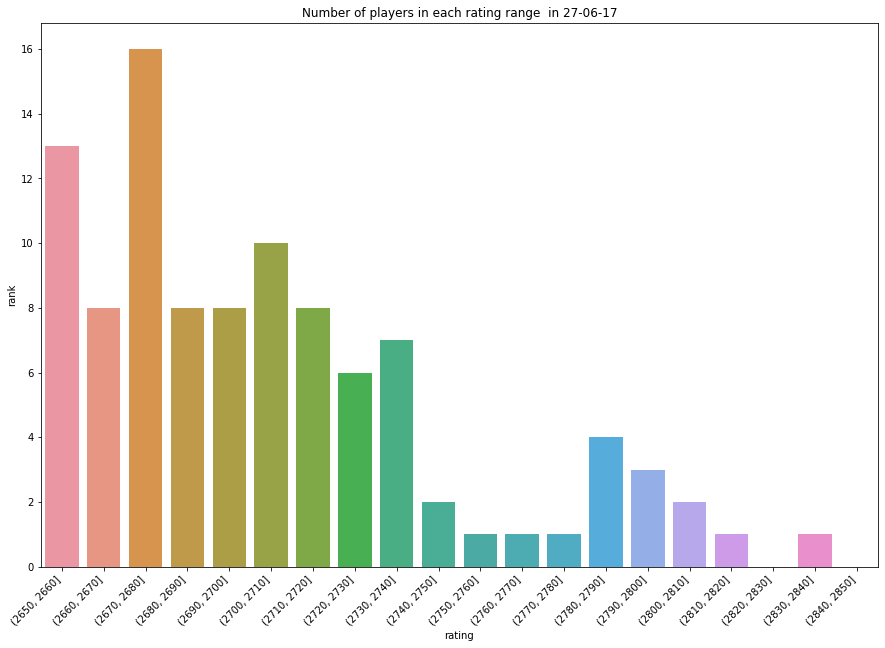

In [15]:
fig_dims = (15, 10)   #Length and width of chart
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(
    x="rating", #Set OX as rating range
    y="rank", #Set OYas count of plyers
    data=sdf.groupby(pd.cut(sdf["rating"], np.arange(2650, 2851, 10))).count()['rank'].reset_index(),  #get code from last line
    ax=ax
)
ax.set_title("Number of players in each rating range  in 27-06-17")   #Title of chart
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right'); #rotate labels 

### 5.5. The highest place that was taken by each country players

In [16]:
df.groupby(['country'])['rank'].min().reset_index() #get hightest rank of each country

,country,rank
0,ARG,86
1,ARM,2
2,AUT,41
3,AZE,4
4,BEL,14
...,...,...
59,UKR,2
60,USA,2
61,UZB,11
62,VEN,72


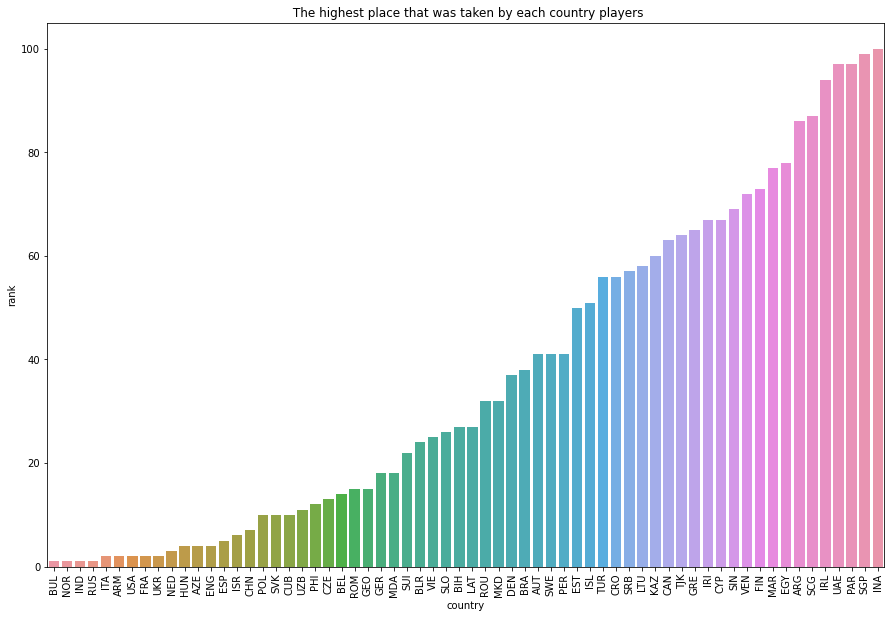

In [18]:
fig_dims = (15, 10)   #Length and width of chart
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(
    x="country",
    y="rank", 
    data=df.groupby(['country'])['rank'].min().reset_index().sort_values(by='rank'),  #get code from last line
    ax=ax
)
ax.set_title(" The highest place that was taken by each country players")   #Title of chart
ax.set_xticklabels(ax.get_xticklabels(), rotation=90); #rotate labels 

## 6. Conclusion

This project gave me a huge experience in working with a big amount of data, build graphs , show statistics.And also find missing values in dataset,clean data and create new columns. So, based from analysis above, we can see that :
 1. Magnus Carlsen had a highest rating over 17 year period (2882).
 2. Russia and Former Sovet Union had a most number of players.
 3. Sergei Tiviakov played more than 1400 games.
 4. In 27-06-2017, it was 16 players in 2670-2680 rating range.
 5. Bulgaria, Norway, India, Russia players had the highest place.